In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w17.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w10.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w03.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w18.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/ou

**Setup & Imports**

In [2]:
# %% [code]
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("default")

from pathlib import Path
from tqdm import tqdm

# Display options
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


**Paths & Data Loading**

In [3]:
def load_and_concat(files, kind="input"):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df["week_file"] = f.name
        df["kind"] = kind
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [4]:
from pathlib import Path 
DATA_DIR= Path("/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final")

input_files= sorted(DATA_DIR.glob("train/input_2023_w*.csv"))
output_files= sorted(DATA_DIR.glob("train/output_2023_w*.csv"))

print(f"Found {len(input_files)} input files and {len(output_files)} output files.")

input_df= load_and_concat(input_files, kind="input")
output_df= load_and_concat(output_files, kind="output")



Found 18 input files and 18 output files.


In [5]:
# %% [code]
def load_and_concat(files, kind="input"):
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df["week_file"] = f.name
        df["kind"] = kind
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

input_df = load_and_concat(input_files, kind="input")
output_df = load_and_concat(output_files, kind="output")

input_df.head(), output_df.head()


(      game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  absolute_yardline_number player_name player_height  player_weight player_birth_date player_position player_side  \
 0  2023090700      101              False   54527         1          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense   
 1  2023090700      101              False   54527         2          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense   
 2  2023090700      101              False   54527         3          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense   
 3  2023090700      101              False   54527         4          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense   
 4  2023090700      101              Fal

**Load Supplementary**

In [6]:
SUPP_FILE_PATH= Path("/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

if SUPP_FILE_PATH.exists():
    supp_df= pd.read_csv(SUPP_FILE_PATH)
    print("Supplementry data load sucessfully!")
    print(supp_df.head())
else:
    print(f"Error: File not Found at {SUPP_FILE_PATH}")

Supplementry data load sucessfully!
      game_id  season  week   game_date game_time_eastern home_team_abbr visitor_team_abbr  play_id                                   play_description  quarter game_clock  down  yards_to_go  \
0  2023090700    2023     1  09/07/2023          20:20:00             KC               DET     3461  (10:46) (Shotgun) J.Goff pass deep left to J.R...        4      10:46     3           12   
1  2023090700    2023     1  09/07/2023          20:20:00             KC               DET      461  (7:30) J.Goff pass short right to J.Reynolds t...        1      07:30     1           10   
2  2023090700    2023     1  09/07/2023          20:20:00             KC               DET     1940  (:09) (Shotgun) J.Goff pass incomplete deep ri...        2      00:09     2           10   
3  2023090700    2023     1  09/07/2023          20:20:00             KC               DET     1711  (:45) (No Huddle, Shotgun) P.Mahomes pass deep...        2      00:45     1           10   

/tmp/ipykernel_13/2999882584.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supp_df= pd.read_csv(SUPP_FILE_PATH)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Basic Cleaning / Filtering**

In [7]:
# %% [code]
# Keep only plays with targeted receiver in input
tr_input = input_df[input_df["player_role"] == "Targeted Receiver"].copy()

# Sanity checks
tr_input[["game_id", "play_id"]].drop_duplicates().shape, tr_input["nfl_id"].nunique()


((14108, 2), 464)

In [8]:
# %% [code]
# Remove obvious garbage / missing landing point if any
tr_input = tr_input.dropna(subset=["ball_land_x", "ball_land_y", "num_frames_output"])

tr_input.shape


(396914, 25)

**Identify Throw Frame**

In [9]:
# %% [code]
throw_frame = (
    tr_input.groupby(["game_id", "play_id", "nfl_id"])["frame_id"]
    .max()
    .reset_index()
    .rename(columns={"frame_id": "throw_frame"})
)

tr_throw = tr_input.merge(throw_frame, on=["game_id", "play_id", "nfl_id"])
tr_throw = tr_throw[tr_throw["frame_id"] == tr_throw["throw_frame"]].copy()

tr_throw[["game_id", "play_id", "nfl_id", "frame_id", "throw_frame"]].head()


,game_id,play_id,nfl_id,frame_id,throw_frame
25,2023090700,101,44930,26,26
57,2023090700,194,41325,32,32
74,2023090700,219,53591,17,17
125,2023090700,361,38696,51,51
145,2023090700,436,53541,20,20


**Extract Receiver Ball-in-Flight Trajectories**

In [10]:
# %% [code]
tr_output = output_df.merge(
    tr_throw[["game_id", "play_id", "nfl_id", "num_frames_output", "ball_land_x", "ball_land_y"]],
    on=["game_id", "play_id", "nfl_id"],
    how="inner"
)

# Assume frame_id in output is already 1..num_frames_output
tr_output["t"] = tr_output["frame_id"].astype(int)

# Sanity
tr_output[["game_id", "play_id", "nfl_id", "t", "num_frames_output"]].head()


,game_id,play_id,nfl_id,t,num_frames_output
0,2023090700,101,44930,1,21
1,2023090700,101,44930,2,21
2,2023090700,101,44930,3,21
3,2023090700,101,44930,4,21
4,2023090700,101,44930,5,21


Compute distance to ball, step lengths, path length

In [11]:
# %% [code]
def euclid(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Receiver distance to ball each frame
tr_output["dist_to_ball_rec"] = euclid(
    tr_output["x"],
    tr_output["y"],
    tr_output["ball_land_x"],
    tr_output["ball_land_y"],
)

# Sort and compute step distance
tr_output = tr_output.sort_values(["game_id", "play_id", "nfl_id", "t"])

tr_output[["x_prev", "y_prev"]] = tr_output.groupby(
    ["game_id", "play_id", "nfl_id"]
)[["x", "y"]].shift(1)

tr_output["step_len_rec"] = euclid(
    tr_output["x"],
    tr_output["y"],
    tr_output["x_prev"],
    tr_output["y_prev"],
)

tr_output.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,game_id,play_id,nfl_id,frame_id,x,y,week_file,kind,num_frames_output,ball_land_x,ball_land_y,t,dist_to_ball_rec,x_prev,y_prev,step_len_rec
0,2023090700,101,44930,1,53.20,13.98,output_2023_w01.csv,output,21,63.259998,-0.22,1,17.402401,NaN,NaN,NaN
1,2023090700,101,44930,2,53.96,13.78,output_2023_w01.csv,output,21,63.259998,-0.22,2,16.807438,53.20,13.98,0.785875
2,2023090700,101,44930,3,54.70,13.54,output_2023_w01.csv,output,21,63.259998,-0.22,3,16.205282,53.96,13.78,0.777946
3,2023090700,101,44930,4,55.41,13.27,output_2023_w01.csv,output,21,63.259998,-0.22,4,15.607773,54.70,13.54,0.759605
4,2023090700,101,44930,5,56.09,12.95,output_2023_w01.csv,output,21,63.259998,-0.22,5,14.995258,55.41,13.27,0.751532


In [12]:
# %% [code]
rec_path_feats = (
    tr_output.groupby(["game_id", "play_id", "nfl_id"])
    .agg(
        path_len_rec=("step_len_rec", "sum"),
        dist_to_ball_rec_start=("dist_to_ball_rec", "first"),
        dist_to_ball_rec_end=("dist_to_ball_rec", "last"),
        T=("t", "max"),
    )
    .reset_index()
)

# Straight-line distance from throw position to ball
throw_xy = tr_throw[
    ["game_id", "play_id", "nfl_id", "x", "y", "ball_land_x", "ball_land_y"]
].copy()

throw_xy["dist_straight_rec"] = euclid(
    throw_xy["x"], throw_xy["y"], throw_xy["ball_land_x"], throw_xy["ball_land_y"]
)

rec_feats = rec_path_feats.merge(
    throw_xy[["game_id", "play_id", "nfl_id", "dist_straight_rec"]],
    on=["game_id", "play_id", "nfl_id"],
    how="left",
)

# Frame rate (assume 10 Hz; change if docs say otherwise)
FPS = 10.0

rec_feats["route_efficiency_rec"] = (
    rec_feats["path_len_rec"] / rec_feats["dist_straight_rec"]
)

rec_feats["closing_speed_rec"] = (
    (rec_feats["dist_to_ball_rec_start"] - rec_feats["dist_to_ball_rec_end"])
    / (rec_feats["T"] / FPS)
)

rec_feats.head()


,game_id,play_id,nfl_id,path_len_rec,dist_to_ball_rec_start,dist_to_ball_rec_end,T,dist_straight_rec,route_efficiency_rec,closing_speed_rec
0,2023090700,101,44930,15.393935,17.402401,3.145695,21,17.986063,0.855881,6.788908
1,2023090700,194,41325,4.564542,3.498240,1.370002,9,4.068413,1.121947,2.364709
2,2023090700,219,53591,1.293282,1.308625,2.151277,8,1.276636,1.013039,-1.053316
3,2023090700,361,38696,6.341358,8.150116,3.172885,16,8.134531,0.779560,3.110770
4,2023090700,436,53541,2.777491,2.925150,0.870058,7,3.220062,0.862558,2.935845


**Aggregate to receive per-play metrics**
Get defensive coverage trajectories

In [13]:
# %% [code]
# Defensive coverage players from input
cov_input = input_df[input_df["player_role"] == "Defensive Coverage"][
    ["game_id", "play_id", "nfl_id", "player_role", "player_side"]
].drop_duplicates()

cov_output = output_df.merge(
    cov_input, on=["game_id", "play_id", "nfl_id"], how="inner"
)

cov_output.head()


,game_id,play_id,nfl_id,frame_id,x,y,week_file,kind,player_role,player_side
0,2023090700,101,46137,1,56.22,17.28,output_2023_w01.csv,output,Defensive Coverage,Defense
1,2023090700,101,46137,2,56.63,16.88,output_2023_w01.csv,output,Defensive Coverage,Defense
2,2023090700,101,46137,3,57.06,16.46,output_2023_w01.csv,output,Defensive Coverage,Defense
3,2023090700,101,46137,4,57.48,16.02,output_2023_w01.csv,output,Defensive Coverage,Defense
4,2023090700,101,46137,5,57.91,15.56,output_2023_w01.csv,output,Defensive Coverage,Defense


In [14]:
# %% [code]
ball_info = tr_throw[["game_id", "play_id", "ball_land_x", "ball_land_y"]].drop_duplicates()

cov_output = cov_output.merge(
    ball_info,
    on=["game_id", "play_id"],
    how="inner",
)

cov_output["t"] = cov_output["frame_id"].astype(int)

cov_output["dist_to_ball_def"] = euclid(
    cov_output["x"],
    cov_output["y"],
    cov_output["ball_land_x"],
    cov_output["ball_land_y"],
)

cov_output.head()


,game_id,play_id,nfl_id,frame_id,x,y,week_file,kind,player_role,player_side,ball_land_x,ball_land_y,t,dist_to_ball_def
0,2023090700,101,46137,1,56.22,17.28,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,1,18.862968
1,2023090700,101,46137,2,56.63,16.88,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,2,18.340307
2,2023090700,101,46137,3,57.06,16.46,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,3,17.795010
3,2023090700,101,46137,4,57.48,16.02,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,4,17.237923
4,2023090700,101,46137,5,57.91,15.56,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,5,16.662259


Nearest defender per frame

In [15]:
# %% [code]
cov_output = cov_output.sort_values(["game_id", "play_id", "t", "dist_to_ball_def"])

nearest_def_per_frame = cov_output.groupby(
    ["game_id", "play_id", "t"], as_index=False
).first()  # because sorted by dist_to_ball_def

nearest_def_per_frame.head()


,game_id,play_id,t,nfl_id,frame_id,x,y,week_file,kind,player_role,player_side,ball_land_x,ball_land_y,dist_to_ball_def
0,2023090700,101,1,46137,1,56.22,17.28,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,18.862968
1,2023090700,101,2,46137,2,56.63,16.88,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,18.340307
2,2023090700,101,3,46137,3,57.06,16.46,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,17.795010
3,2023090700,101,4,46137,4,57.48,16.02,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,17.237923
4,2023090700,101,5,46137,5,57.91,15.56,output_2023_w01.csv,output,Defensive Coverage,Defense,63.259998,-0.22,16.662259


In [16]:
# %% [code]
nearest_def_per_frame = nearest_def_per_frame.sort_values(
    ["game_id", "play_id", "t"]
)

nearest_def_per_frame[["x_prev", "y_prev"]] = nearest_def_per_frame.groupby(
    ["game_id", "play_id"]
)[["x", "y"]].shift(1)

nearest_def_per_frame["step_len_def"] = euclid(
    nearest_def_per_frame["x"],
    nearest_def_per_frame["y"],
    nearest_def_per_frame["x_prev"],
    nearest_def_per_frame["y_prev"],
)

def_feats = (
    nearest_def_per_frame.groupby(["game_id", "play_id"])
    .agg(
        path_len_def=("step_len_def", "sum"),
        dist_to_ball_def_start=("dist_to_ball_def", "first"),
        dist_to_ball_def_end=("dist_to_ball_def", "last"),
        T=("t", "max"),
        # capture which defender is nearest at end (optional)
        nfl_id_def_end=("nfl_id", "last"),
    )
    .reset_index()
)

def_feats["closing_speed_def"] = (
    (def_feats["dist_to_ball_def_start"] - def_feats["dist_to_ball_def_end"])
    / (def_feats["T"] / FPS)
)

def_feats.head()


,game_id,play_id,path_len_def,dist_to_ball_def_start,dist_to_ball_def_end,T,nfl_id_def_end,closing_speed_def
0,2023090700,101,14.518482,18.862968,4.865655,21,46137,6.665387
1,2023090700,194,5.301250,5.415429,0.911811,9,54653,5.004021
2,2023090700,219,8.565465,5.444353,5.049831,8,44888,0.493154
3,2023090700,361,6.177671,9.866407,4.599228,16,46137,3.291987
4,2023090700,436,1.747281,4.587047,3.393303,7,46137,1.705349


**Build Play-Level Table & BFSA Metric**

In [17]:
# %% [code]
play_feats = rec_feats.merge(
    def_feats,
    on=["game_id", "play_id", "T"],  # join on T just to be safe
    how="inner",
)

# Add supplementary info (pass_result, route, coverage, etc.)
play_feats = play_feats.merge(
    supp_df[
        [
            "game_id",
            "play_id",
            "pass_result",
            "route_of_targeted_receiver",
            "team_coverage_man_zone",
            "team_coverage_type",
            "pass_length",
        ]
    ].drop_duplicates(),
    on=["game_id", "play_id"],
    how="left",
)

# Main metric: Ball-in-Flight Separation Advantage (BFSA)
play_feats["BFSA"] = (
    play_feats["dist_to_ball_rec_end"] - play_feats["dist_to_ball_def_end"]
)

play_feats.head()


,game_id,play_id,nfl_id,path_len_rec,dist_to_ball_rec_start,dist_to_ball_rec_end,T,dist_straight_rec,route_efficiency_rec,closing_speed_rec,path_len_def,dist_to_ball_def_start,dist_to_ball_def_end,nfl_id_def_end,closing_speed_def,pass_result,route_of_targeted_receiver,team_coverage_man_zone,team_coverage_type,pass_length,BFSA
0,2023090700,101,44930,15.393935,17.402401,3.145695,21,17.986063,0.855881,6.788908,14.518482,18.862968,4.865655,46137,6.665387,I,CORNER,ZONE_COVERAGE,COVER_2_ZONE,22,-1.719960
1,2023090700,194,41325,4.564542,3.498240,1.370002,9,4.068413,1.121947,2.364709,5.301250,5.415429,0.911811,54653,5.004021,C,ANGLE,MAN_COVERAGE,COVER_1_MAN,6,0.458191
2,2023090700,219,53591,1.293282,1.308625,2.151277,8,1.276636,1.013039,-1.053316,8.565465,5.444353,5.049831,44888,0.493154,C,HITCH,ZONE_COVERAGE,COVER_4_ZONE,4,-2.898553
3,2023090700,361,38696,6.341358,8.150116,3.172885,16,8.134531,0.779560,3.110770,6.177671,9.866407,4.599228,46137,3.291987,C,HITCH,ZONE_COVERAGE,COVER_4_ZONE,5,-1.426343
4,2023090700,436,53541,2.777491,2.925150,0.870058,7,3.220062,0.862558,2.935845,1.747281,4.587047,3.393303,46137,1.705349,C,SLANT,MAN_COVERAGE,COVER_1_MAN,6,-2.523245


**EDA**

In [18]:
# %% [code]
play_feats["is_complete"] = (play_feats["pass_result"] == "C").astype(int)

play_feats[["BFSA", "route_efficiency_rec", "closing_speed_rec", "closing_speed_def", "is_complete"]].describe()


,BFSA,route_efficiency_rec,closing_speed_rec,closing_speed_def,is_complete
count,12966.000000,12966.000000,12966.000000,12966.000000,12966.000000
mean,-2.020577,0.989587,3.626334,3.013873,0.669906
std,2.601891,0.670874,2.564838,2.468567,0.470265
min,-18.810574,0.028795,-5.922424,-7.146065,0.000000
25%,-3.285670,0.811684,1.669869,1.483335,0.000000
50%,-1.588281,0.921394,3.881115,3.013620,1.000000
75%,-0.494805,1.033413,5.498411,4.628458,1.000000
max,36.838074,32.803277,9.908826,9.809879,1.000000


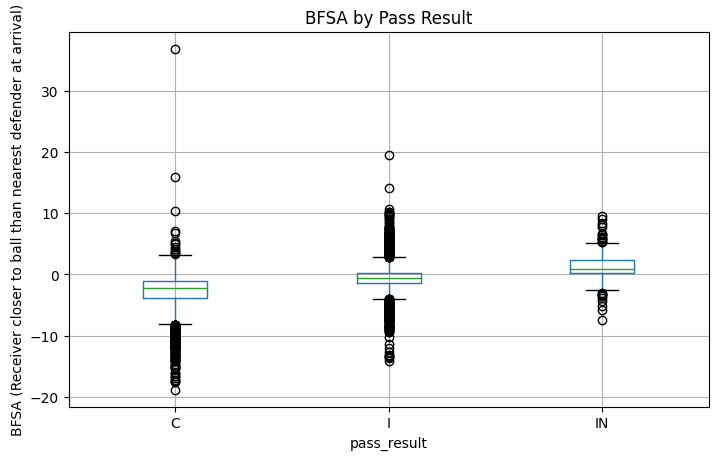

In [19]:
# %% [code]
# BFSA by outcome
fig, ax = plt.subplots(figsize=(8, 5))
play_feats.boxplot(column="BFSA", by="pass_result", ax=ax)
ax.set_title("BFSA by Pass Result")
ax.set_ylabel("BFSA (Receiver closer to ball than nearest defender at arrival)")
plt.suptitle("")
plt.show()


/tmp/ipykernel_13/166264702.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_by_bin = play_feats.groupby("BFSA_bin")["is_complete"].mean().reset_index()


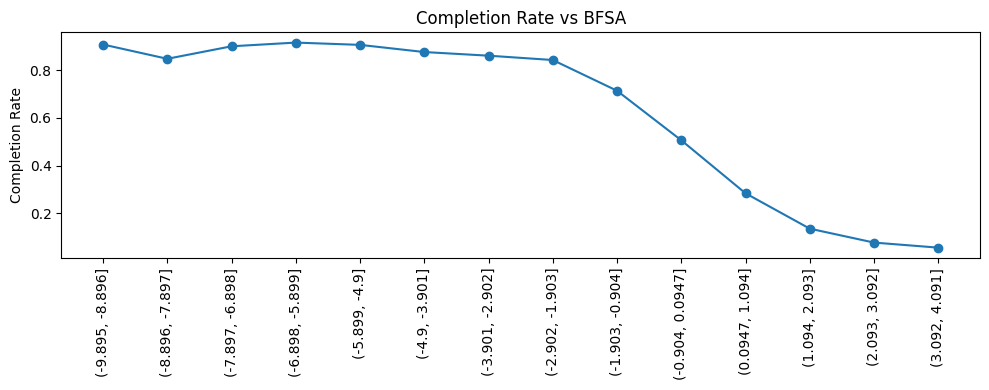

In [20]:
# %% [code]
# Completion rate by BFSA bin
bins = np.linspace(play_feats["BFSA"].quantile(0.01),
                   play_feats["BFSA"].quantile(0.99), 15)
play_feats["BFSA_bin"] = pd.cut(play_feats["BFSA"], bins=bins)

comp_by_bin = play_feats.groupby("BFSA_bin")["is_complete"].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(len(comp_by_bin)), comp_by_bin["is_complete"], marker="o")
ax.set_xticks(range(len(comp_by_bin)))
ax.set_xticklabels(comp_by_bin["BFSA_bin"], rotation=90)
ax.set_ylabel("Completion Rate")
ax.set_title("Completion Rate vs BFSA")
plt.tight_layout()
plt.show()


**Simple Logistic Model**

In [21]:
# %% [code]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_df = play_feats.dropna(
    subset=["BFSA", "route_efficiency_rec", "closing_speed_rec", "closing_speed_def", "is_complete"]
).copy()

X = model_df[["BFSA", "route_efficiency_rec", "closing_speed_rec", "closing_speed_def", "pass_length"]]
y = model_df["is_complete"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=1000)),
    ]
)

pipe.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, accuracy_score

y_pred_proba = pipe.predict_proba(X_valid)[:, 1]
y_pred = pipe.predict(X_valid)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("ROC AUC:", roc_auc_score(y_valid, y_pred_proba))


Accuracy: 0.7565552699228791
ROC AUC: 0.7995453817335025


In [22]:
# %% [code]
coef = pipe.named_steps["logreg"].coef_[0]
feature_importance = pd.DataFrame(
    {"feature": X.columns, "coef": coef}
).sort_values("coef", ascending=False)
feature_importance


,feature,coef
3,closing_speed_def,0.233257
1,route_efficiency_rec,0.192935
4,pass_length,-0.272970
2,closing_speed_rec,-0.342120
0,BFSA,-1.400504


**Visualization for Media Gallery**

In [23]:
# %% [code]
def plot_play_frames(game_id, play_id, max_frames=20):
    rec_traj = tr_output[
        (tr_output["game_id"] == game_id)
        & (tr_output["play_id"] == play_id)
    ].copy()

    def_traj = nearest_def_per_frame[
        (nearest_def_per_frame["game_id"] == game_id)
        & (nearest_def_per_frame["play_id"] == play_id)
    ].copy()

    ball_x = rec_traj["ball_land_x"].iloc[0]
    ball_y = rec_traj["ball_land_y"].iloc[0]

    for t in range(1, min(max_frames, rec_traj["t"].max()) + 1):
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)

        # receiver up to time t
        r = rec_traj[rec_traj["t"] <= t]
        ax.plot(r["x"], r["y"], marker="o", label="Targeted Receiver")

        # defender up to time t
        d = def_traj[def_traj["t"] <= t]
        ax.plot(d["x"], d["y"], marker="^", label="Nearest Defender")

        ax.scatter([ball_x], [ball_y], marker="x", s=100, label="Ball Landing")

        ax.set_title(f"Game {game_id}, Play {play_id}, Frame {t}")
        ax.legend(loc="upper right")
        plt.show()


In [24]:
play_feats[["game_id", "play_id"]].head(20)


,game_id,play_id
0,2023090700,101
1,2023090700,194
2,2023090700,219
3,2023090700,361
4,2023090700,436
5,2023090700,461
6,2023090700,530
7,2023090700,621
8,2023090700,713
9,2023090700,736


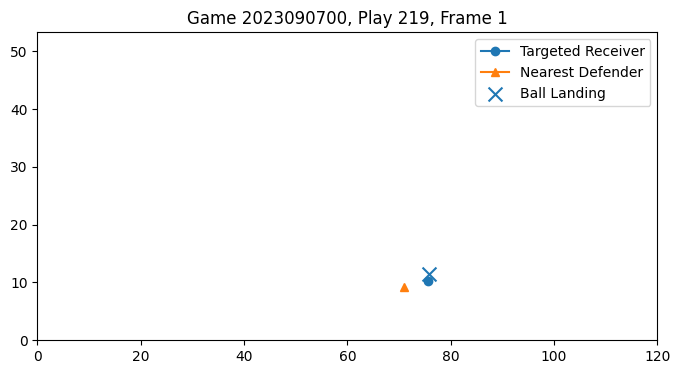

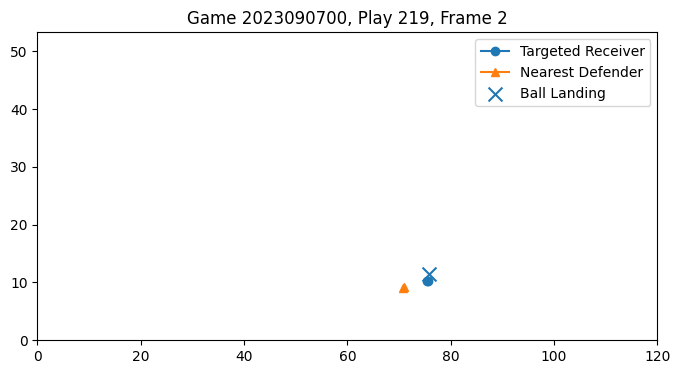

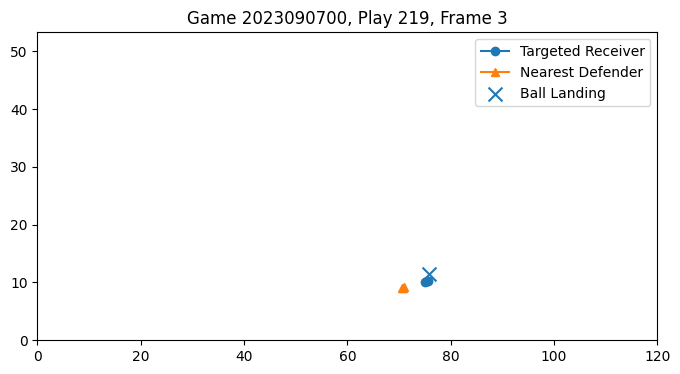

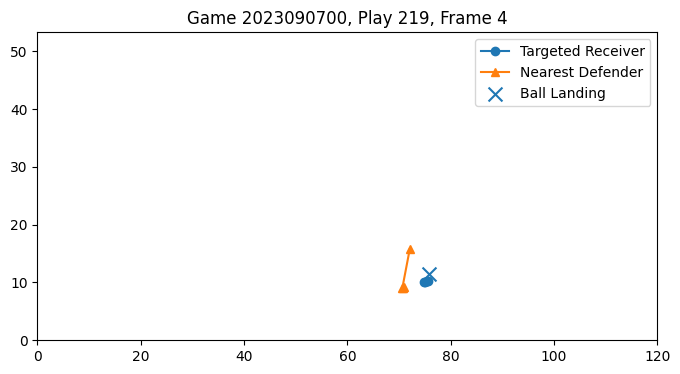

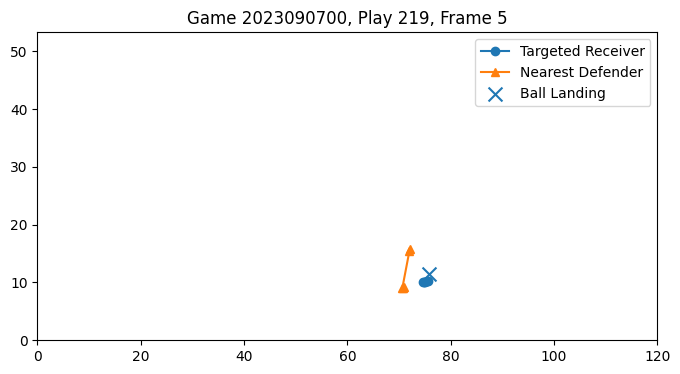

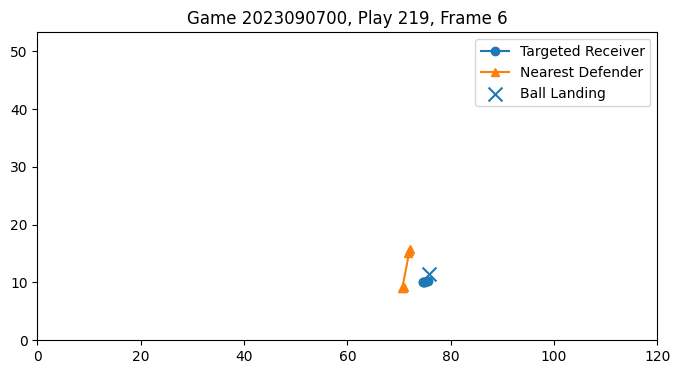

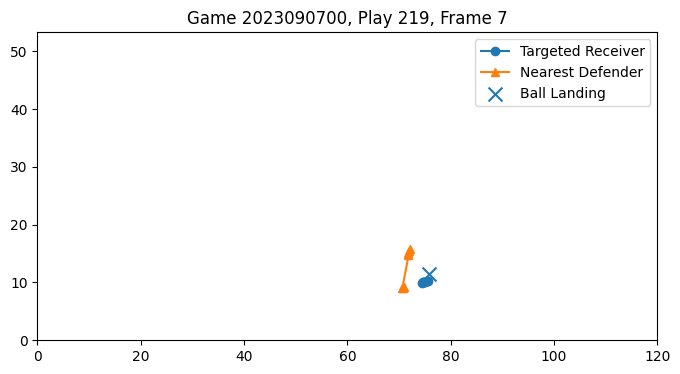

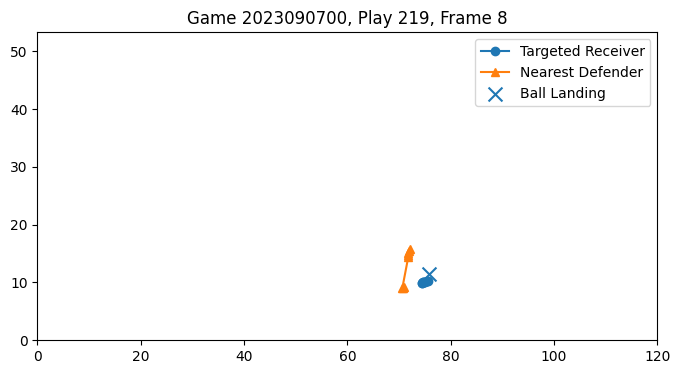

In [25]:
plot_play_frames(game_id=2023090700, play_id=219, max_frames=20)


In [26]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def animate_play_mp4(game_id, play_id, save_path="play.mp4", fps=5):
    """
    Create an MP4 animation of the ball-in-flight movement
    for the targeted receiver and nearest defender.
    """

    rec = tr_output[(tr_output.game_id == game_id) & (tr_output.play_id == play_id)]
    dev = nearest_def_per_frame[(nearest_def_per_frame.game_id == game_id) & (nearest_def_per_frame.play_id == play_id)]

    if rec.empty or dev.empty:
        print("No valid data for this play. Try another play_id.")
        return
    
    ball_x = rec["ball_land_x"].iloc[0]
    ball_y = rec["ball_land_y"].iloc[0]
    frames = int(rec["t"].max())

    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)

    rec_line, = ax.plot([], [], 'o-', label="Receiver", color="blue")
    def_line, = ax.plot([], [], '^-', label="Defender", color="red")
    ax.scatter(ball_x, ball_y, s=200, marker="x", color="black", label="Ball Landing")

    ax.legend()

    def update(frame):
        r = rec[rec.t <= frame]
        d = dev[dev.t <= frame]

        rec_line.set_data(r.x, r.y)
        def_line.set_data(d.x, d.y)

        ax.set_title(f"Game {game_id}, Play {play_id}, Frame {frame}")
        return rec_line, def_line

    writer = FFMpegWriter(fps=fps, metadata=dict(artist='BDB2026'))
    anim = FuncAnimation(fig, update, frames=frames, interval=200, blit=False)

    anim.save(save_path, writer=writer)
    plt.close()
    print(f"MP4 animation saved to: {save_path}")


In [27]:
animate_play_mp4(2023090700, 101, save_path="g1_p101.mp4")


MP4 animation saved to: g1_p101.mp4


In [28]:
def plot_bfsa_timeline(game_id, play_id):
    rec = tr_output[(tr_output.game_id == game_id) & (tr_output.play_id == play_id)].copy()
    dev = nearest_def_per_frame[(nearest_def_per_frame.game_id == game_id) & (nearest_def_per_frame.play_id == play_id)].copy()

    if rec.empty or dev.empty:
        print("Invalid play.")
        return

    df = rec[["game_id","play_id","t","dist_to_ball_rec"]].merge(
        dev[["game_id","play_id","t","dist_to_ball_def"]],
        on=["game_id","play_id","t"],
        how="inner"
    )

    df["BFSA_t"] = df["dist_to_ball_rec"] - df["dist_to_ball_def"]

    plt.figure(figsize=(8,4))
    plt.plot(df.t, df.dist_to_ball_rec, label="Receiver distance to ball")
    plt.plot(df.t, df.dist_to_ball_def, label="Defender distance to ball")
    plt.plot(df.t, df.BFSA_t, label="BFSA (Receiver - Defender)", linestyle="--")

    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel("Frame (t)")
    plt.ylabel("Distance (yards)")
    plt.title("Ball-in-Flight Separation Timeline")
    plt.legend()
    plt.show()


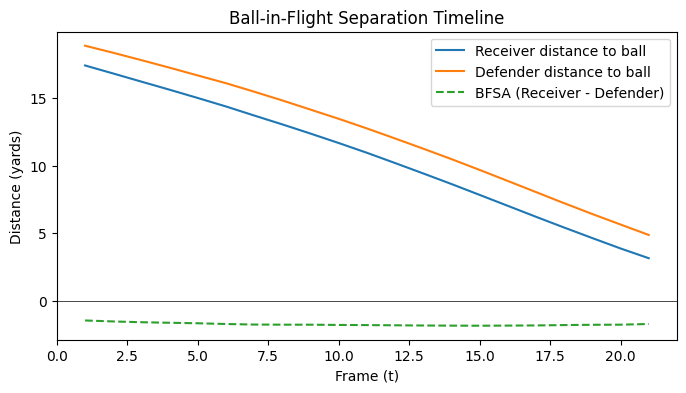

In [29]:
plot_bfsa_timeline(2023090700, 101)
